## Setup

In [5]:
import time
import os
import xarray as xr
import zarr

input_directory = r"~/Desktop/CIPM/FruitFlyPheno/data/test/PRISM/"  # Replace with the path to your directory
input_directory = os.path.expanduser(input_directory)

output_zarr_store = (
    r"~/Desktop/CIPM/FruitFlyPheno/data/zarr/"  # Replace with the desired output path
)

## create Zarr store

In [8]:
# Import Required Libraries
import os
import xarray as xr
import zarr


# Function to convert NetCDF files in a directory to a Zarr store
def convert_netcdf_to_zarr(input_directory, output_zarr_store):
    # List all .nc files in the input directory
    netcdf_files = []
    for root, dirs, files in os.walk(input_directory):
        for file in files:
            if file.endswith(".nc"):
                netcdf_files.append(os.path.join(root, file))

        # Save the combined dataset to a Zarr store

    try:
        datasets = [xr.open_dataset(nc_file) for nc_file in netcdf_files[0:50]] # Limiting to 50 files for testing
    except ValueError:
        print(datasets[:0])
        print("ValueError: Unable to open the NetCDF files. Please check the files.")
        return
    combined_dataset = xr.concat(datasets, dim="t")
    combined_dataset.to_zarr(output_zarr_store, mode="w")


# Define the input directory and output Zarr store


zf = convert_netcdf_to_zarr(input_directory, output_zarr_store)


['/home/thom/Desktop/CIPM/FruitFlyPheno/data/test/PRISM/2001/PRISM_combo_20010107.nc', '/home/thom/Desktop/CIPM/FruitFlyPheno/data/test/PRISM/2001/PRISM_combo_20010103.nc', '/home/thom/Desktop/CIPM/FruitFlyPheno/data/test/PRISM/2001/PRISM_combo_20010106.nc', '/home/thom/Desktop/CIPM/FruitFlyPheno/data/test/PRISM/2001/PRISM_combo_20010105.nc', '/home/thom/Desktop/CIPM/FruitFlyPheno/data/test/PRISM/2001/PRISM_combo_20010101.nc', '/home/thom/Desktop/CIPM/FruitFlyPheno/data/test/PRISM/2001/PRISM_combo_20010104.nc', '/home/thom/Desktop/CIPM/FruitFlyPheno/data/test/PRISM/2001/PRISM_combo_20010108.nc', '/home/thom/Desktop/CIPM/FruitFlyPheno/data/test/PRISM/2001/PRISM_combo_20010102.nc', '/home/thom/Desktop/CIPM/FruitFlyPheno/data/test/PRISM/2001/PRISM_combo_20010110.nc', '/home/thom/Desktop/CIPM/FruitFlyPheno/data/test/PRISM/2001/PRISM_combo_20010109.nc', '/home/thom/Desktop/CIPM/FruitFlyPheno/data/test/PRISM/2010/PRISM_combo_20100105.nc', '/home/thom/Desktop/CIPM/FruitFlyPheno/data/test/PRIS

## read zarr store

In [9]:
data = xr.open_zarr(output_zarr_store)
lat_min, lat_max = 36.23115, 33.0  # Example latitude range
lon_min, lon_max = -119.7, -117  # Example longitude range
time_start, time_end = "2000-01-01", "2023-01-31"  # Example time range
# Subset the dataset by latitude, longitude, and time
subset = data.sel(
    latitude=slice(lat_min, lat_max),
    longitude=slice(lon_min, lon_max),
    # t=slice(time_start, time_end),
)

# Select only the variables 'tmin' and 'tmax'
subset = subset[["tmin", "tmax"]]
start_time = time.time()
dat = subset.values
end_time = time.time()
print(f"Time taken to read the data: {end_time - start_time} seconds")
subset["tmax"].isel(t=0).plot()
import xpublish

rest = xpublish.SingleDatasetRest(data)

Time taken to read the data: 8.058547973632812e-05 seconds


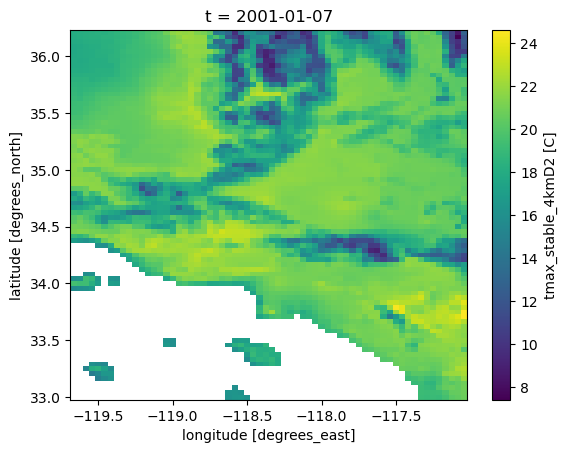

In [3]:
import zarr
from fsspec.implementations.http import HTTPFileSystem

fs = HTTPFileSystem()

# The URL 'http://0.0.0.0:9000/zarr/' here serves one dataset
http_map = fs.get_mapper("http://0.0.0.0:8000/zarr/")

# open as a zarr group
zg = zarr.open_consolidated(http_map, mode="r")

# or open as another Xarray Dataset
ds = xr.open_zarr(http_map, consolidated=True)

ClientResponseError: 500, message='Internal Server Error', url='http://0.0.0.0:8000/zarr/.zmetadata'

In [5]:
import xarray as xr
import zarr
import numpy as np
import pandas as pd


# Create a simple xarray Dataset
data = xr.Dataset(
    {
        "temperature": (("time", "lat", "lon"), 20 * np.random.rand(4, 3, 2)),
    },
    coords={
        "time": pd.date_range("2023-01-01", periods=4),
        "lat": [10, 20, 30],
        "lon": [100, 110],
    },
)

# Save the dataset as a Zarr store
data.to_zarr("simple_zarr_dataset.zarr", consolidated=True)

In [6]:
import xarray as xr
import xpublish

# Load the simple Zarr dataset
data = xr.open_zarr("simple_zarr_dataset.zarr")

# Create the REST API for the dataset
rest = xpublish.SingleDatasetRest(data)

# Start the server and keep it running
if __name__ == "__main__":
    print("Serving simple dataset...")
    rest.serve(host="0.0.0.0", port=8000)

Serving simple dataset...


RuntimeError: asyncio.run() cannot be called from a running event loop

In [ ]:
import zarr
from fsspec.implementations.http import HTTPFileSystem

fs = HTTPFileSystem()

# The URL 'http://0.0.0.0:8000/zarr/' here serves the simple dataset
http_map = fs.get_mapper("http://0.0.0.0:8000/zarr/")

# Open as a Zarr group
zg = zarr.open_consolidated(http_map, mode="r")

# Or open as another Xarray Dataset
ds = xr.open_zarr(http_map, consolidated=True)